<a href="https://colab.research.google.com/github/Dikchik9100/Portfolio/blob/main/Copy_of_Sna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import community
import warnings
warnings.filterwarnings("ignore")
from networkx.algorithms import community

G = nx.read_edgelist("/content/facebook_combined.txt.gz")
communities = community.greedy_modularity_communities(G)
print(f"Number of communities detected: {len(communities)}")


Number of communities detected: 16


In [ ]:
print("✅ Dataset Loaded Successfully!")
print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")


✅ Dataset Loaded Successfully!
Total Nodes: 4039
Total Edges: 88234


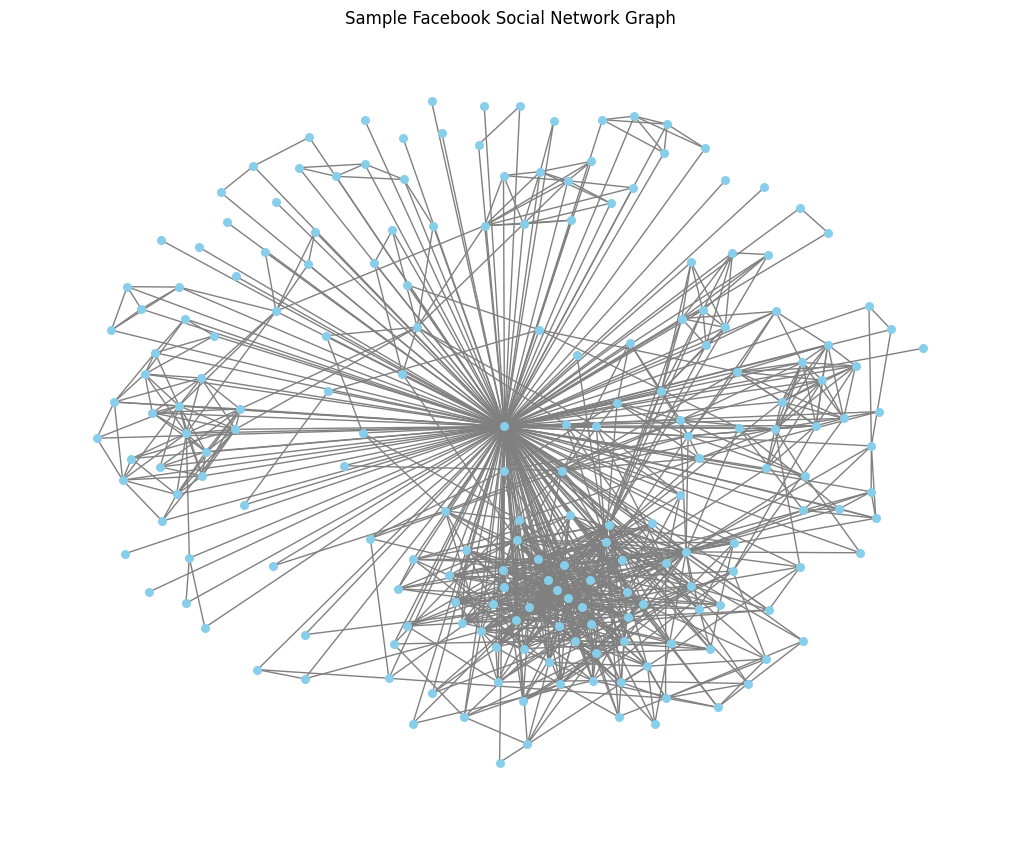

In [ ]:
# --- STEP 4: Network Visualization (subset for clarity) ---
plt.figure(figsize=(10,8))
subgraph = G.subgraph(list(G.nodes())[:200])  # visualize only 200 nodes for readability
nx.draw(subgraph, node_size=30, node_color='skyblue', edge_color='gray', with_labels=False)
plt.title("Sample Facebook Social Network Graph")
plt.show()


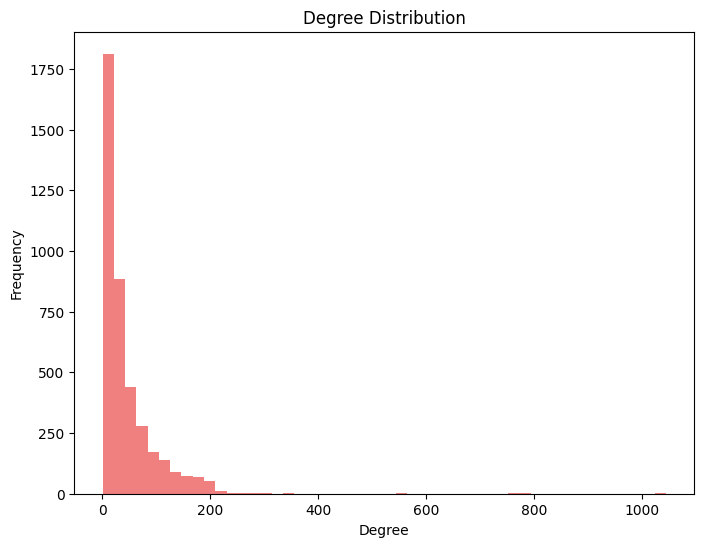

In [ ]:
# --- STEP 5: Degree Distribution ---
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(8,6))
plt.hist(degree_sequence, bins=50, color='lightcoral')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# --- STEP 6: Centrality Measures ---
print("\nCalculating Centrality Measures...")

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, k=500, seed=42)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500)


Calculating Centrality Measures...


In [ ]:
# Combine into DataFrame
centrality_df = pd.DataFrame({
    "Node": list(G.nodes()),
    "Degree Centrality": list(degree_centrality.values()),
    "Closeness Centrality": list(closeness_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

print("\nTop 10 Influential Nodes (by Degree Centrality):")
display(centrality_df.sort_values("Degree Centrality", ascending=False).head(10))


Top 10 Influential Nodes (by Degree Centrality):


,Node,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
107,107,0.258791,0.459699,0.489707,2.606940e-04
351,1684,0.196137,0.393606,0.344536,7.164260e-06
352,1912,0.186974,0.350947,0.216324,9.540696e-02
1821,3437,0.135463,0.314413,0.222233,9.531613e-08
0,0,0.085934,0.353343,0.161446,3.391796e-05
1490,2543,0.072808,0.291300,0.006708,7.287131e-02
2154,2347,0.072065,0.283408,0.002758,8.032160e-02
1373,1888,0.062902,0.321292,0.000139,1.060441e-04
1285,1800,0.060674,0.321599,0.000216,1.019310e-04
1149,1663,0.058197,0.339185,0.001180,1.285378e-04


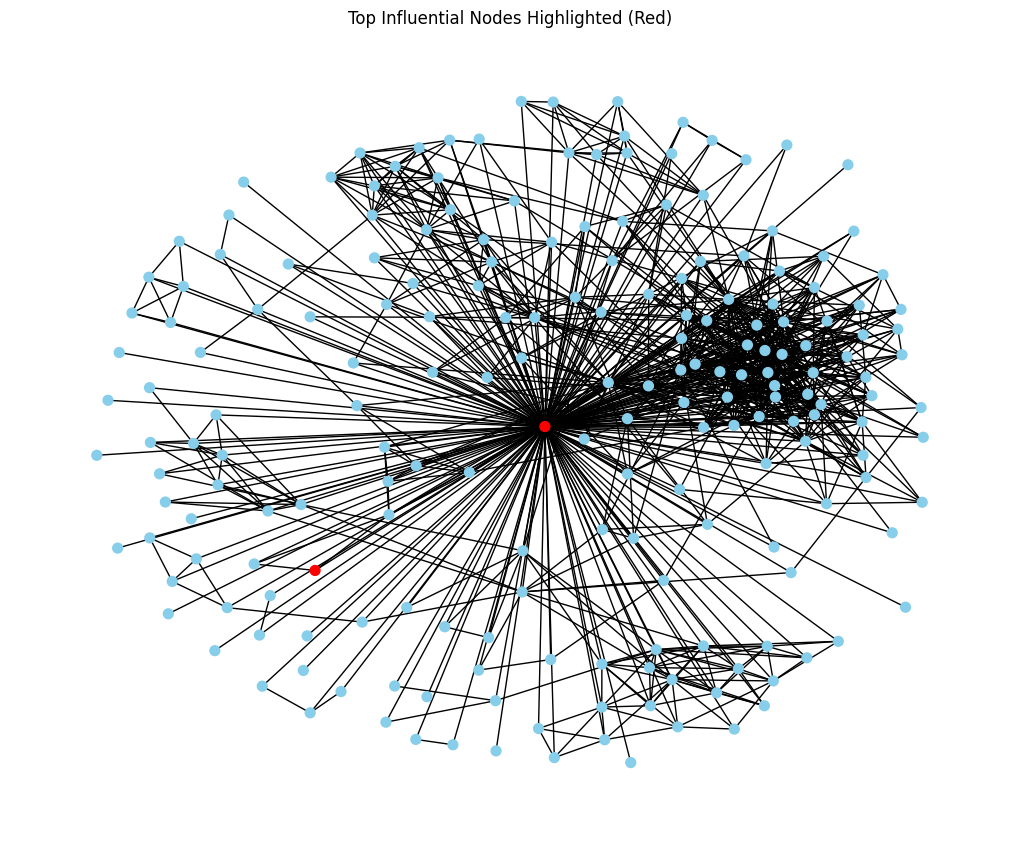

In [ ]:
# --- STEP 7: Visualization of Top Nodes ---
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_nodes_ids = [n for n, _ in top_nodes]

plt.figure(figsize=(10,8))
color_map = ['red' if node in top_nodes_ids else 'skyblue' for node in subgraph.nodes()]
nx.draw(subgraph, node_size=50, node_color=color_map, with_labels=False)
plt.title("Top Influential Nodes Highlighted (Red)")
plt.show()


In [ ]:
# --- STEP 8: Community Detection ---
print("\nDetecting Communities using Greedy Modularity Algorithm...")
communities = community.greedy_modularity_communities(G)
num_communities = len(communities)
print(f"Total communities detected: {num_communities}")



Detecting Communities using Greedy Modularity Algorithm...
Total communities detected: 16


In [ ]:
# Convert to list of sets for modularity computation
modularity = community.modularity(G, communities)
print(f"Network Modularity: {modularity:.4f}")


Network Modularity: 0.7745


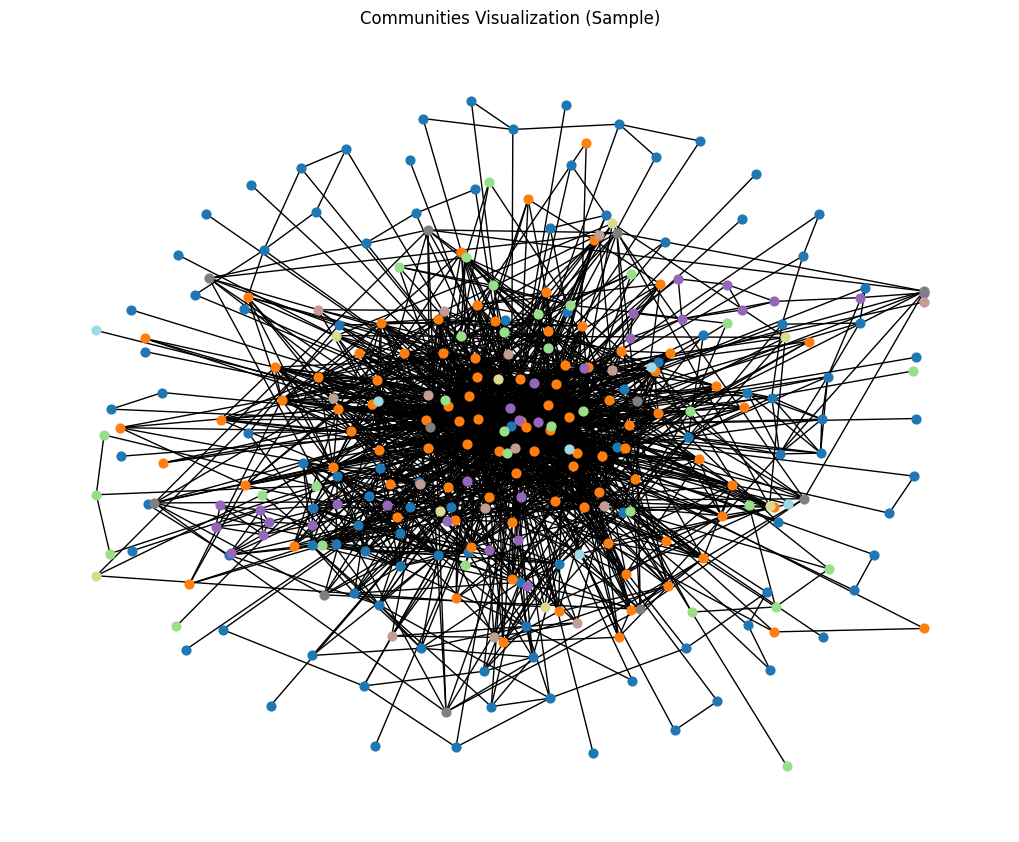


SUMMARY OF RESULTS:
----------------------------------------------------
Nodes: 4039 | Edges: 88234
Communities Detected: 16
Network Modularity: 0.7745
----------------------------------------------------
Top Influential Nodes based on centrality metrics are potential key connectors or influencers.
Communities reveal clusters of people with dense internal connections — indicating close friend groups or similar interests.
Degree distribution shows a few nodes with very high degrees, meaning the network follows a 'scale-free' pattern common in social graphs.


In [ ]:
# --- STEP 9: Visualize Communities (subset) ---
subgraph_nodes = list(G.nodes())[:300]
subG = G.subgraph(subgraph_nodes)
communities_sub = list(community.greedy_modularity_communities(subG))

plt.figure(figsize=(10,8))
colors = plt.cm.tab20(np.linspace(0,1,len(communities_sub)))
for c, color in zip(communities_sub, colors):
    nx.draw(subG.subgraph(c), node_size=40, node_color=[color], with_labels=False)
plt.title("Communities Visualization (Sample)")
plt.show()

# --- STEP 10: Summary & Insights ---
print("\nSUMMARY OF RESULTS:")
print("----------------------------------------------------")
print(f"Nodes: {G.number_of_nodes()} | Edges: {G.number_of_edges()}")
print(f"Communities Detected: {num_communities}")
print(f"Network Modularity: {modularity:.4f}")
print("----------------------------------------------------")
print("Top Influential Nodes based on centrality metrics are potential key connectors or influencers.")
print("Communities reveal clusters of people with dense internal connections — indicating close friend groups or similar interests.")
print("Degree distribution shows a few nodes with very high degrees, meaning the network follows a 'scale-free' pattern common in social graphs.")